## Imports

In [ ]:
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

## Creating and Tokenizing the Documents (Dataset)

In [3]:
documents = [
    "Artificial intelligence has revolutionized various industries, from healthcare to finance. The ability of AI systems to analyze large datasets and make predictions has significantly improved decision-making processes. In healthcare, for example, AI-powered tools can assist in diagnosing diseases and predicting patient outcomes. Similarly, in finance, AI algorithms are used for fraud detection, risk management, and investment strategies. The widespread adoption of AI indicates its transformative impact on the way we approach complex problems.",
    "The field of natural language processing (NLP) has witnessed remarkable advancements in recent years. NLP techniques enable machines to understand, interpret, and generate human-like text, facilitating communication between computers and users. Sentiment analysis, machine translation, and chatbot development are just a few applications of NLP that have gained prominence. Researchers continue to explore new methods, such as transformer models, to enhance language understanding and generation. As NLP capabilities grow, the potential for improving human-computer interaction and information retrieval becomes increasingly evident."
]

Tokenized_Documents = [word_tokenize(document.lower()) for document in documents]
print(Tokenized_Documents)

[['artificial', 'intelligence', 'has', 'revolutionized', 'various', 'industries', ',', 'from', 'healthcare', 'to', 'finance', '.', 'the', 'ability', 'of', 'ai', 'systems', 'to', 'analyze', 'large', 'datasets', 'and', 'make', 'predictions', 'has', 'significantly', 'improved', 'decision-making', 'processes', '.', 'in', 'healthcare', ',', 'for', 'example', ',', 'ai-powered', 'tools', 'can', 'assist', 'in', 'diagnosing', 'diseases', 'and', 'predicting', 'patient', 'outcomes', '.', 'similarly', ',', 'in', 'finance', ',', 'ai', 'algorithms', 'are', 'used', 'for', 'fraud', 'detection', ',', 'risk', 'management', ',', 'and', 'investment', 'strategies', '.', 'the', 'widespread', 'adoption', 'of', 'ai', 'indicates', 'its', 'transformative', 'impact', 'on', 'the', 'way', 'we', 'approach', 'complex', 'problems', '.'], ['the', 'field', 'of', 'natural', 'language', 'processing', '(', 'nlp', ')', 'has', 'witnessed', 'remarkable', 'advancements', 'in', 'recent', 'years', '.', 'nlp', 'techniques', 'ena

## Preprocessing the Documents

In [4]:
Preprocessed_Documents = []

for Each_Document in Tokenized_Documents:
    Cleaned_Tokens = []
    for word in Each_Document:
        if word.isalpha() and word not in stop_words and word not in string.punctuation:
            Cleaned_Tokens.append(word)
    Preprocessed_Documents.append(Cleaned_Tokens)

print(Preprocessed_Documents)

[['artificial', 'intelligence', 'revolutionized', 'various', 'industries', 'healthcare', 'finance', 'ability', 'ai', 'systems', 'analyze', 'large', 'datasets', 'make', 'predictions', 'significantly', 'improved', 'processes', 'healthcare', 'example', 'tools', 'assist', 'diagnosing', 'diseases', 'predicting', 'patient', 'outcomes', 'similarly', 'finance', 'ai', 'algorithms', 'used', 'fraud', 'detection', 'risk', 'management', 'investment', 'strategies', 'widespread', 'adoption', 'ai', 'indicates', 'transformative', 'impact', 'way', 'approach', 'complex', 'problems'], ['field', 'natural', 'language', 'processing', 'nlp', 'witnessed', 'remarkable', 'advancements', 'recent', 'years', 'nlp', 'techniques', 'enable', 'machines', 'understand', 'interpret', 'generate', 'text', 'facilitating', 'communication', 'computers', 'users', 'sentiment', 'analysis', 'machine', 'translation', 'chatbot', 'development', 'applications', 'nlp', 'gained', 'prominence', 'researchers', 'continue', 'explore', 'new'

## Defining the Word2Vec Model

In [5]:
model = Word2Vec(sentences = Preprocessed_Documents, vector_size = 3, window = 2, min_count = 1)

## Generating Word Embeddings for the Documents Using the Word2Vec Model

In [6]:
First_Document_Word_Embeddings = {}
for word in Preprocessed_Documents[0]:
    First_Document_Word_Embeddings[word] = model.wv[word]

print(First_Document_Word_Embeddings)

Second_Document_Word_Embeddings = {}
for word in Preprocessed_Documents[1]:
    Second_Document_Word_Embeddings[word] = model.wv[word]

print('\n', Second_Document_Word_Embeddings)

{'artificial': array([ 0.00030875,  0.04059728, -0.28183573], dtype=float32), 'intelligence': array([-0.19031398,  0.06199959,  0.2030622 ], dtype=float32), 'revolutionized': array([-0.15990856, -0.10362723,  0.22657977], dtype=float32), 'various': array([0.05417529, 0.00644164, 0.11603643], dtype=float32), 'industries': array([0.00729018, 0.32061788, 0.1689054 ], dtype=float32), 'healthcare': array([-0.12552305,  0.24608919, -0.05106157], dtype=float32), 'finance': array([-0.1512881 ,  0.21858916, -0.1617801 ], dtype=float32), 'ability': array([-0.29727286, -0.23476347,  0.03014623], dtype=float32), 'ai': array([ 0.3001672 , -0.31020463, -0.23688969], dtype=float32), 'systems': array([ 0.21304193, -0.2873026 ,  0.12244277], dtype=float32), 'analyze': array([0.1729197 , 0.19147304, 0.24909998], dtype=float32), 'large': array([-0.20573904,  0.03679812,  0.20173101], dtype=float32), 'datasets': array([0.09421877, 0.18004763, 0.23508854], dtype=float32), 'make': array([-0.0947789 , -0.205

## Sorting the Words Alphabetically

In [7]:
First_Document_Weights = []
Second_Document_Weights = []

print("Word Embeddings for the first document:")
for word, embedding in sorted(First_Document_Word_Embeddings.items()):
    First_Document_Weights.append(embedding)
    print(f"{word}: {embedding}")

print("\nWord Embeddings for the second document:")
for word, embedding in sorted(Second_Document_Word_Embeddings.items()):
    Second_Document_Weights.append(embedding)
    print(f"{word}: {embedding}")

Word Embeddings for the first document:
ability: [-0.29727286 -0.23476347  0.03014623]
adoption: [ 0.16589873  0.30764198 -0.27177042]
ai: [ 0.3001672  -0.31020463 -0.23688969]
algorithms: [0.16892767 0.2252389  0.02552789]
analyze: [0.1729197  0.19147304 0.24909998]
approach: [-0.25637448 -0.05063615  0.0825132 ]
artificial: [ 0.00030875  0.04059728 -0.28183573]
assist: [-0.02007996 -0.18984212  0.12842718]
complex: [-0.02988658  0.18439712 -0.09105986]
datasets: [0.09421877 0.18004763 0.23508854]
detection: [-0.25069273 -0.03110321  0.31822056]
diagnosing: [0.09276913 0.22970136 0.20342562]
diseases: [ 0.01896675  0.24802333 -0.02704833]
example: [-0.16455877  0.14667381 -0.05760849]
finance: [-0.1512881   0.21858916 -0.1617801 ]
fraud: [ 0.19202855 -0.25067502 -0.1310947 ]
healthcare: [-0.12552305  0.24608919 -0.05106157]
impact: [-0.22656626 -0.11825063  0.31336516]
improved: [ 0.07822295 -0.15049177  0.27975136]
indicates: [-0.29204854 -0.14648598 -0.00108722]
industries: [0.00729

## Plotting the Word Embeddings for the First Document in 3D

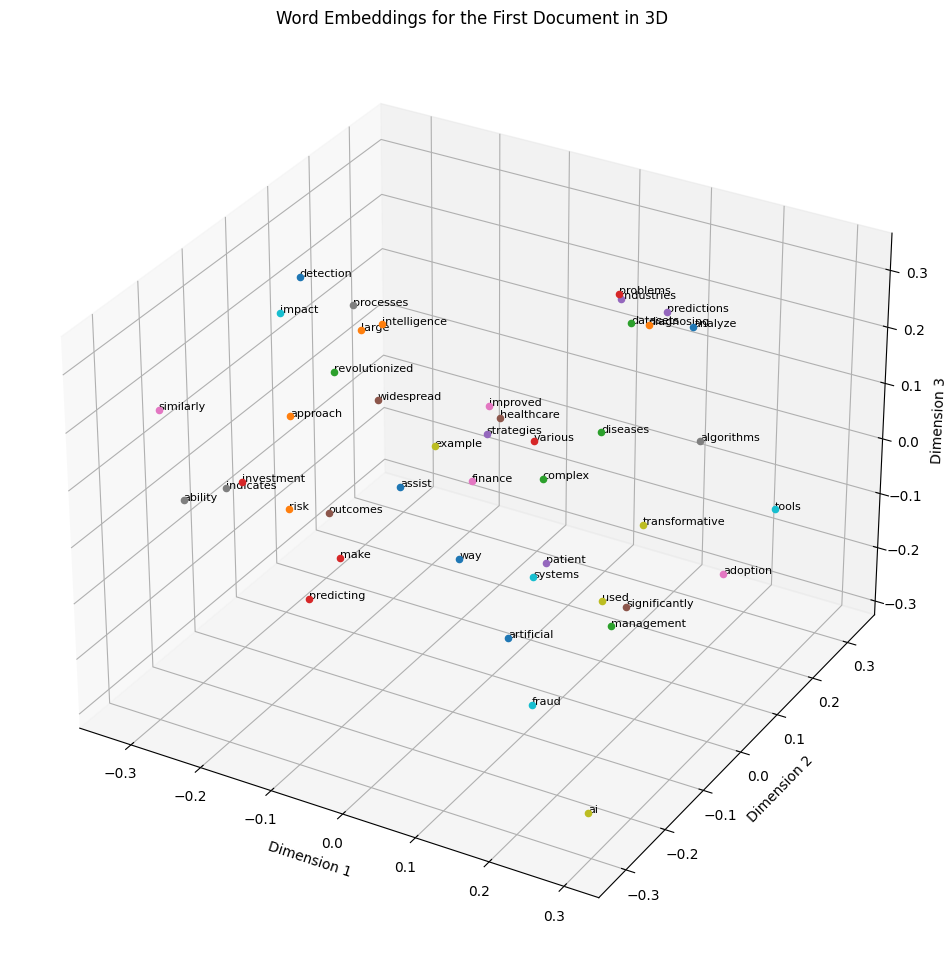

In [8]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for word, embedding in First_Document_Word_Embeddings.items():
    ax.scatter(embedding[0], embedding[1], embedding[2])
    ax.text(embedding[0], embedding[1], embedding[2], word, size=8, zorder=1, color='k')

ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
ax.set_title("Word Embeddings for the First Document in 3D")
plt.show()

## Plotting the Word Embeddings for the Second Document in 3D

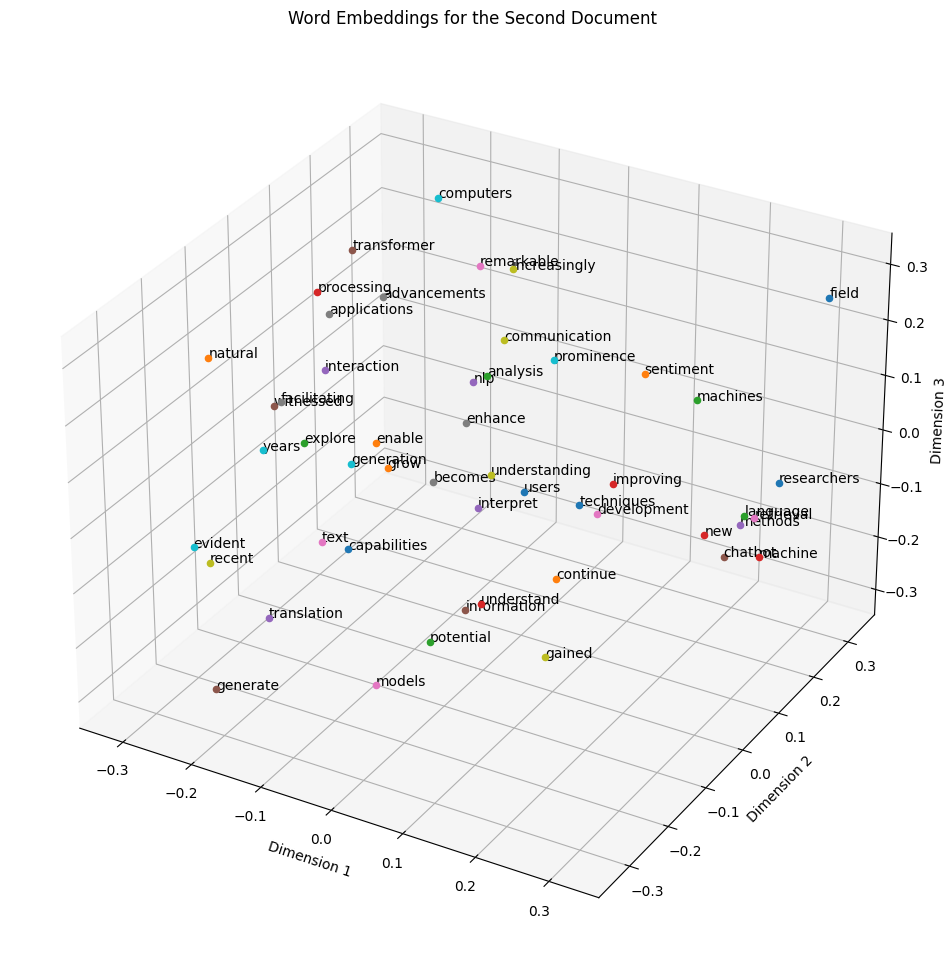

In [9]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for word, embedding in Second_Document_Word_Embeddings.items():
    ax.scatter(embedding[0], embedding[1], embedding[2])
    ax.text(embedding[0], embedding[1], embedding[2], word, color='k')

ax.set_title("Word Embeddings for the Second Document")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.show()
